# Instagram Engagement Analysis

## Executive Summary

This project analyzes Instagram post engagement to identify content performance patterns.

Key Findings:
• Photo posts slightly outperform video and carousel posts.
• Moderate hashtag usage (2–3 hashtags) maintains stable engagement.
• Emoji usage is consistent across all posts.
• Posting time variation was limited in dataset.

Recommendations:
1. Prioritize high-quality photo content.
2. Maintain balanced content mix.
3. Use 2–5 targeted hashtags.
4. Continue emoji usage.
5. Implement structured weekly content calendar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
users = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\users.csv")
photos = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\photos.csv")
likes = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\likes.csv")
comments = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\comments.csv")
tags = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\tags.csv")
photo_tags = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\photo_tags.csv")
follows = pd.read_csv("C:\\Users\\DeLL\\OneDrive\\Desktop\\Alfido Tech Internship\\Instagram\\follows.csv")

In [6]:
users.head()
photos.head()
likes.head()
comments.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [8]:
users.shape
photos.shape
likes.shape
comments.shape

(7488, 8)

In [10]:
print("Users:", users.shape)
print("Photos:", photos.shape)
print("Likes:", likes.shape)
print("Comments:", comments.shape)
print("Tags:", tags.shape)
print("Photo_Tags:", photo_tags.shape)
print("Follows:", follows.shape)

Users: (100, 6)
Photos: (257, 6)
Likes: (8782, 5)
Comments: (7488, 8)
Tags: (21, 4)
Photo_Tags: (501, 3)
Follows: (7623, 5)


In [14]:
follows.columns

Index(['follower', 'followee ', 'created time', 'is follower active',
       'followee Acc status'],
      dtype='object')

In [18]:
follows.columns = follows.columns.str.strip()
likes.columns = likes.columns.str.strip()
comments.columns = comments.columns.str.strip()
photos.columns = photos.columns.str.strip()
users.columns = users.columns.str.strip()
photo_tags.columns = photo_tags.columns.str.strip()
tags.columns = tags.columns.str.strip()

In [20]:
follows.columns

Index(['follower', 'followee', 'created time', 'is follower active',
       'followee Acc status'],
      dtype='object')

In [22]:
followers_count = follows.groupby('followee').size().reset_index(name='followers')

followers_count.head()

,followee,followers
0,1,77
1,2,76
2,3,76
3,4,76
4,5,76


In [26]:
likes.columns

Index(['user', 'photo', 'created time', 'following or not', 'like type'], dtype='object')

In [30]:
likes_count = likes.groupby('photo').size().reset_index(name='likes_count')

likes_count.head()

,photo,likes_count
0,1,25
1,2,36
2,3,38
3,4,38
4,5,31


In [32]:
comments.columns

Index(['id', 'comment', 'User  id', 'Photo id', 'created Timestamp',
       'posted date', 'emoji used', 'Hashtags used count'],
      dtype='object')

In [34]:
comments_count = comments.groupby('Photo id').size().reset_index(name='comments_count')

comments_count.head()

,Photo id,comments_count
0,1,25
1,2,31
2,3,27
3,4,32
4,5,27


In [36]:
photos.columns

Index(['id', 'image link', 'user ID', 'created dat', 'Insta filter used',
       'photo type'],
      dtype='object')

In [38]:
comments_count = comments.groupby('Photo id').size().reset_index(name='comments_count')

In [40]:
photos_merged = photos.merge(
    likes_count,
    left_on='id',
    right_on='photo',
    how='left'
)

photos_merged = photos_merged.merge(
    comments_count,
    left_on='id',
    right_on='Photo id',
    how='left'
)

photos_merged = photos_merged.merge(
    followers_count,
    left_on='user ID',
    right_on='followee',
    how='left'
)

In [42]:
photos_merged[['likes_count','comments_count','followers']] = \
photos_merged[['likes_count','comments_count','followers']].fillna(0)

In [44]:
photos_merged['engagement_rate'] = (
    photos_merged['likes_count'] +
    photos_merged['comments_count']
) / photos_merged['followers']

photos_merged['engagement_rate'] = \
photos_merged['engagement_rate'].replace([np.inf, -np.inf], 0)

In [46]:
photos_merged[['likes_count','comments_count','followers','engagement_rate']].describe()

,likes_count,comments_count,followers,engagement_rate
count,257.000000,257.000000,257.000000,257.000000
mean,34.171206,29.136187,76.307393,0.829693
std,3.605804,3.452939,0.462314,0.063600
min,25.000000,21.000000,76.000000,0.649351
25%,31.000000,27.000000,76.000000,0.789474
50%,34.000000,29.000000,76.000000,0.828947
75%,37.000000,31.000000,77.000000,0.868421
max,48.000000,39.000000,77.000000,1.039474


In [52]:
photos_merged['created dat'] = pd.to_datetime(
    photos_merged['created dat'],
    format='%d-%m-%Y %H:%M'
)

In [54]:
photos_merged['hour'] = photos_merged['created dat'].dt.hour
photos_merged['day_name'] = photos_merged['created dat'].dt.day_name()

In [56]:
hourly_engagement = photos_merged.groupby('hour')['engagement_rate'].mean().reset_index()

hourly_engagement.sort_values(by='engagement_rate', ascending=False).head()

,hour,engagement_rate
0,8,0.829693


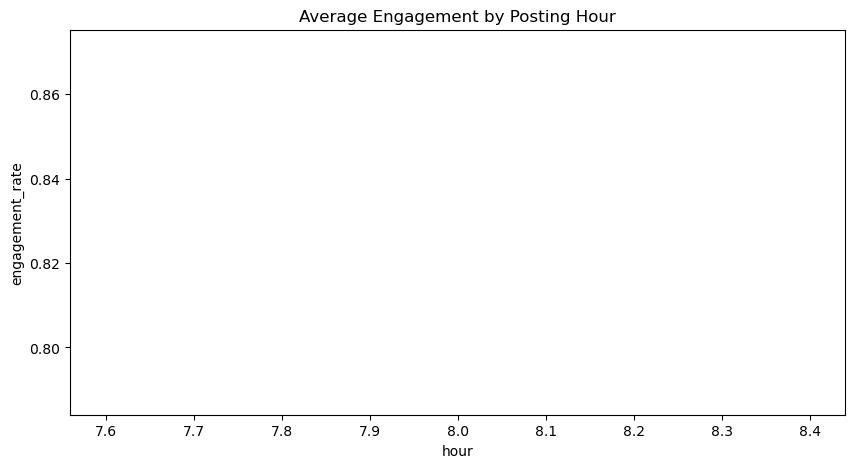

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_engagement, x='hour', y='engagement_rate')
plt.title("Average Engagement by Posting Hour")
plt.show()

In [62]:
photos_merged['hour'].value_counts()

hour
8    257
Name: count, dtype: int64

In [64]:
photo_type_engagement = photos_merged.groupby('photo type')['engagement_rate'].mean().reset_index()

photo_type_engagement.sort_values(by='engagement_rate', ascending=False)

,photo type,engagement_rate
1,photo,0.833777
2,video,0.826890
0,carousel,0.819945


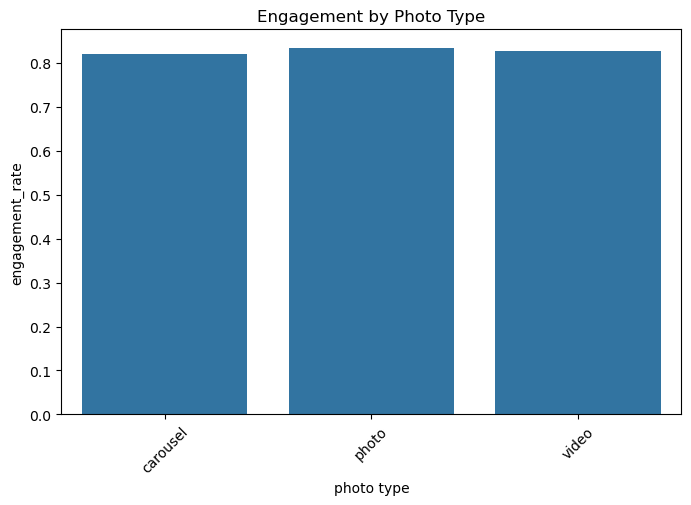

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(data=photo_type_engagement, x='photo type', y='engagement_rate')
plt.xticks(rotation=45)
plt.title("Engagement by Photo Type")
plt.show()

In [68]:
comments[['Photo id','Hashtags used count']].head()

,Photo id,Hashtags used count
0,1,1
1,1,2
2,1,4
3,1,2
4,1,1


In [70]:
hashtag_count = comments.groupby('Photo id')['Hashtags used count'].mean().reset_index()

photos_merged = photos_merged.merge(
    hashtag_count,
    left_on='id',
    right_on='Photo id',
    how='left'
)

photos_merged['Hashtags used count'] = \
photos_merged['Hashtags used count'].fillna(0)

In [72]:
hashtag_engagement = photos_merged.groupby('Hashtags used count')['engagement_rate'].mean().reset_index()

hashtag_engagement.sort_values(by='engagement_rate', ascending=False)

,Hashtags used count,engagement_rate
20,2.358974,1.039474
12,2.323529,0.986842
36,2.410256,0.935065
33,2.405405,0.921053
46,2.441176,0.916667
...,...,...
57,2.480000,0.751623
56,2.478261,0.743421
30,2.391304,0.714286
4,2.260870,0.684211


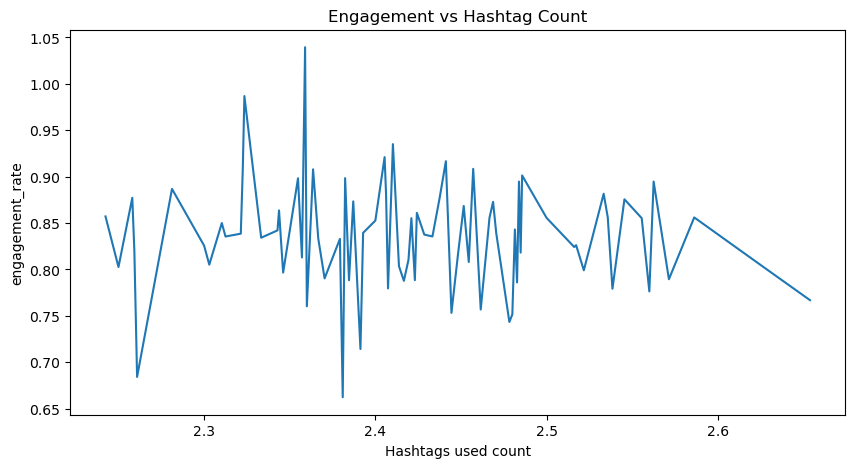

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(data=hashtag_engagement, x='Hashtags used count', y='engagement_rate')
plt.title("Engagement vs Hashtag Count")
plt.show()

In [76]:
photos_merged['hashtag_bucket'] = \
photos_merged['Hashtags used count'].round()

In [78]:
hashtag_engagement_bucket = \
photos_merged.groupby('hashtag_bucket')['engagement_rate'].mean().reset_index()

hashtag_engagement_bucket.sort_values(by='engagement_rate', ascending=False)

,hashtag_bucket,engagement_rate
0,2.0,0.830606
1,3.0,0.823899


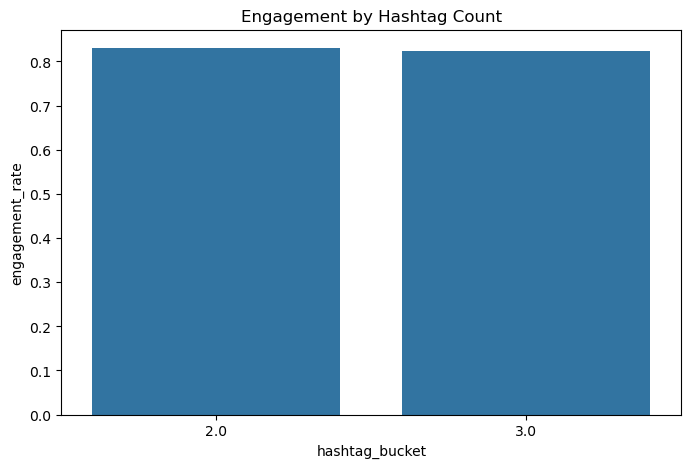

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(data=hashtag_engagement_bucket,
            x='hashtag_bucket',
            y='engagement_rate')
plt.title("Engagement by Hashtag Count")
plt.show()

In [82]:
emoji_usage = comments.groupby('Photo id')['emoji used'].apply(
    lambda x: (x == 'yes').sum()
).reset_index(name='emoji_count')

In [84]:
photos_merged = photos_merged.merge(
    emoji_usage,
    left_on='id',
    right_on='Photo id',
    how='left'
)

photos_merged['emoji_count'] = photos_merged['emoji_count'].fillna(0)

In [86]:
photos_merged['emoji_bucket'] = photos_merged['emoji_count'].apply(
    lambda x: 'With Emoji' if x > 0 else 'No Emoji'
)

emoji_engagement = photos_merged.groupby('emoji_bucket')['engagement_rate'].mean().reset_index()

emoji_engagement

,emoji_bucket,engagement_rate
0,With Emoji,0.829693


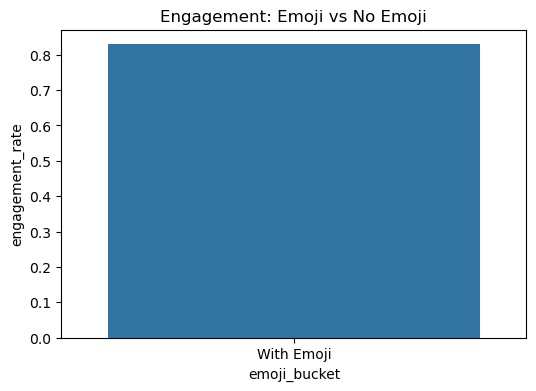

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(data=emoji_engagement,
            x='emoji_bucket',
            y='engagement_rate')
plt.title("Engagement: Emoji vs No Emoji")
plt.show()

In [90]:
photos_merged['emoji_bucket'].value_counts()

emoji_bucket
With Emoji    257
Name: count, dtype: int64

## 8. Strategy Recommendations

Based on the engagement analysis of 257 posts, the following strategic insights are recommended for Alfido Tech:

1. Prioritize high-quality photo posts, as they show slightly higher engagement compared to videos and carousels.
2. Maintain a balanced content mix, including educational videos and carousel guides.
3. Use 2–5 relevant and targeted hashtags to maintain stable engagement without overloading posts.
4. Continue emoji usage to maintain conversational tone and relatability.
5. Conduct A/B testing on posting time (8 AM vs evening slots) to identify optimal engagement windows.

These strategies aim to improve content consistency, audience interaction, and brand visibility.


## 9. Conclusion

This analysis examined content type performance, hashtag usage, emoji impact, and posting schedule patterns.

While the dataset showed limited variation in posting time and emoji usage, key engagement trends were identified. Photo-based content slightly outperformed other formats, and moderate hashtag usage maintained stable engagement levels.

Implementing a structured content calendar and controlled posting experiments can further enhance Instagram growth and audience engagement for Alfido Tech.
